In [127]:
from subprocess import check_output
print(check_output(["ls", "../stock_exchange"]).decode("utf8"))

fundamentals.csv
prices.csv
prices-split-adjusted.csv
README.md
securities.csv
stock_prediction.ipynb



In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation
import math
import time
import sys
from sklearn.preprocessing import MinMaxScaler

In [136]:
data=pd.read_csv('../stock_exchange/prices.csv')
YHOO=data.loc[data['symbol'] == 'YHOO']

# Forcasting

In [137]:
# step1: 

forecast_col = 'close'
YHOO.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(YHOO)))
print(forecast_out)
YHOO['label'] = YHOO[forecast_col].shift(-forecast_out)
#print(df.head())


18


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [138]:
# Step2:
X=np.array(YHOO.drop(['label','symbol','date'], axis=1))
#print(X)
X = preprocessing.scale(X)
#print(X)
X_lately = X[-forecast_out:]
#print(X_lately)
X = X[:-forecast_out]
YHOO.dropna(inplace=True)
y = np.array(YHOO['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [139]:
# Step3: Train
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [140]:
#confident
confidence = clf.score(X_test, y_test)
print(confidence)
#Predict
Linear_REG=clf.predict(X_test)

0.9666182394831173


[39.76028995 40.47366173 41.44650568 41.67471741 41.07661593 41.38749618
 40.70316343 37.99865334 38.72981589 38.29740594 39.25871512 39.10228102
 38.33740309 38.62274489 38.91157694 38.53035841 38.49728928 38.5658102 ]


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


2016-12-05 00:00:00
1480914000.0
2016-12-06 00:00:00


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                    date symbol  open  close  low  high  volume  label  \
2016-12-20 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-21 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-22 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-23 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-24 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   

                      Forecast  
2016-12-20 00:00:00  38.622745  
2016-12-21 00:00:00  38.911577  
2016-12-22 00:00:00  38.530358  
2016-12-23 00:00:00  38.497289  
2016-12-24 00:00:00  38.565810  


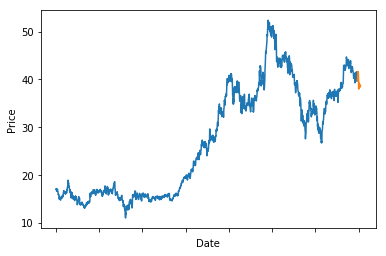

In [141]:
#final Step :
forecast_set = clf.predict(X_lately)
print(forecast_set)
YHOO['Forecast'] = np.nan
last_date = YHOO.iloc[-1].date
last_date=dt.strptime(last_date, '%Y-%m-%d')
#timestamp = time.mktime(time_123)
#a=repr(last_date)
dt_1 = dt1.datetime(last_date.year, last_date.month, last_date.day, 0, 0)
print (dt_1)
k = time.mktime(dt_1.timetuple())
print k

#time.mktime(dt.timetuple())
dt_2 = dt.fromtimestamp(86400)

one_day =time.mktime(dt_2.timetuple())
next_unix = dt.fromtimestamp(k + one_day) 
print next_unix
for i in forecast_set:
    next_u=time.mktime(next_unix.timetuple())
    #next_date = dt.fromtimestamp(next_u)
    next_u += 86400
    next_unix = dt.fromtimestamp(next_u)
    YHOO.loc[next_unix] = [np.nan for _ in range(len(YHOO.columns)-1)]+[i]
print(YHOO.tail())
YHOO['close'].plot()
YHOO['Forecast'].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# Random Forest

In [114]:
YHOO=data.loc[data['symbol'] == 'YHOO']
yahoo_stock_prices = YHOO.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

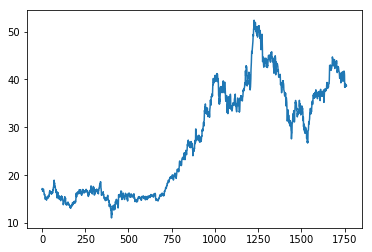

In [115]:
plt.plot(yahoo_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [116]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

(1409, 353)


In [117]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [118]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [119]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [120]:
#Step 2 Build Model

In [121]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=True, input_shape=(None, 1))`
  


('compilation time : ', 0.016328811645507812)


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


In [122]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 2s 1ms/step - loss: 0.1321 - val_loss: 0.2878
Epoch 2/10
1336/1336 [==============================] - 0s 96us/step - loss: 0.0693 - val_loss: 0.1391
Epoch 3/10
1336/1336 [==============================] - 0s 100us/step - loss: 0.0385 - val_loss: 0.0606
Epoch 4/10
1336/1336 [==============================] - 0s 118us/step - loss: 0.0275 - val_loss: 0.0361
Epoch 5/10
1336/1336 [==============================] - 0s 98us/step - loss: 0.0183 - val_loss: 0.0217
Epoch 6/10
1336/1336 [==============================] - 0s 96us/step - loss: 0.0086 - val_loss: 0.0049
Epoch 7/10
1336/1336 [==============================] - 0s 94us/step - loss: 0.0033 - val_loss: 5.6436e-04
Epoch 8/10
1336/1336 [==============================] - 0s 90us/step - loss: 0.0019 - val_loss: 3.8496e-04
Epoch 9/10
1336/1336 [==============================] - 0s 94us/step - loss: 0.0019 - val_loss: 8.2360e-04
Epoch 10/10
13

In [123]:
Random_forest=model.predict(testX)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
for i in xrange(0, 5):
        print "Actual outcome :: {} and Predicted outcome :: {}".format(list(testY)[i], Random_forest[i])


Actual outcome :: 0.60416662693 and Predicted outcome :: [0.6514529]
Actual outcome :: 0.566860496998 and Predicted outcome :: [0.62211436]
Actual outcome :: 0.601744234562 and Predicted outcome :: [0.58214104]
Actual outcome :: 0.609253942966 and Predicted outcome :: [0.61950576]
Actual outcome :: 0.605862379074 and Predicted outcome :: [0.62759846]


In [124]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
#predictions = predict_sequences_multiple(model, testY, predict_length)
#print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
#plot_results_multiple(predictions, testY, predict_length)

NameError: global name 'newaxis' is not defined

In [51]:
XL = YHOO
XL.shape

(1762, 7)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [53]:
XL.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [54]:
XL['changeduringday'] = ((data['high'] - data['low'] )/ data['low'])*100

XL['changefrompreviousday'] = (abs(XL['close'].shift() - XL['close'] )/ XL['close'])*100

/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
print("**The new features 'changeduring day & change from previous day are added to the dataset. Note: The first row for change from previous day for each stock is NA or blank always")
XL.head()

**The new features 'changeduring day & change from previous day are added to the dataset. Note: The first row for change from previous day for each stock is NA or blank always


,date,symbol,open,close,low,high,volume,changeduringday,changefrompreviousday
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0,1.895747,NaN
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0,1.352941,0.754498
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,1.347387,0.349447
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,1.991551,2.814365
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,0.842353,0.000000


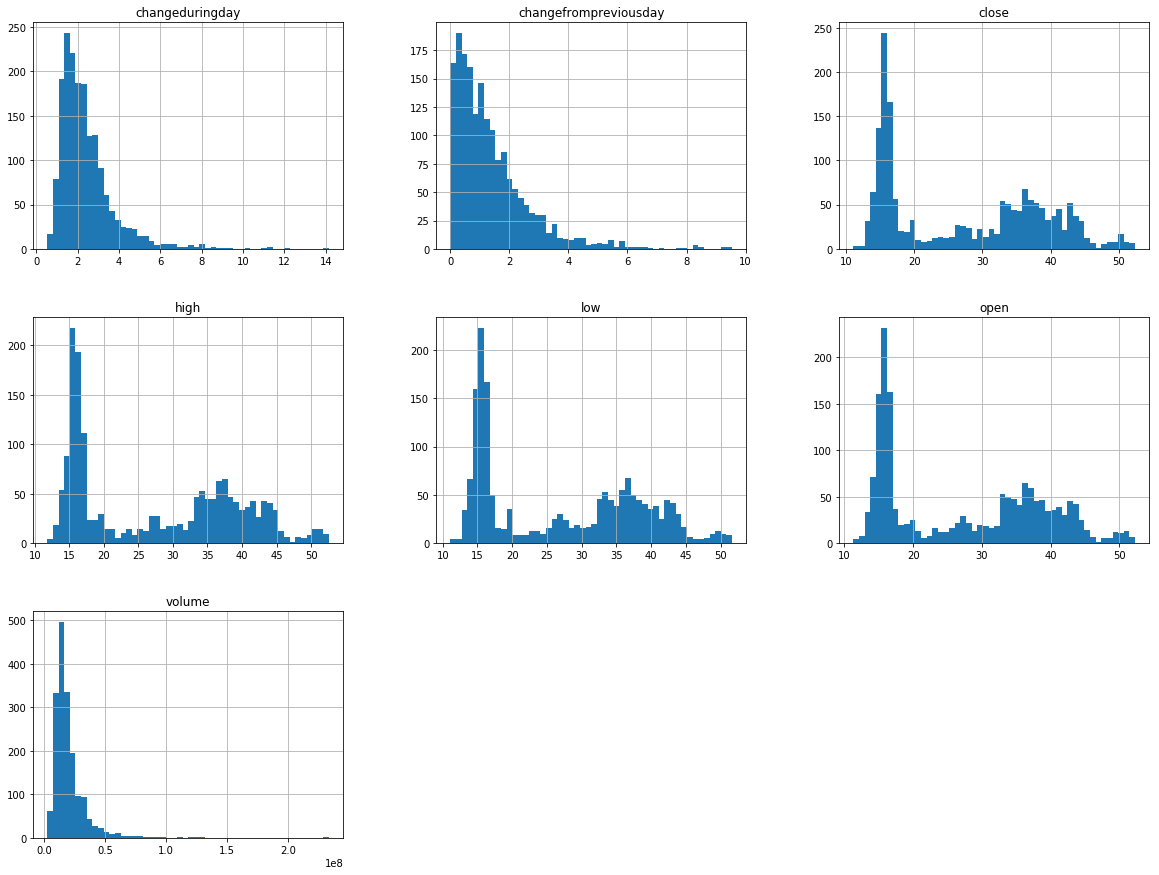

In [56]:
XL.hist(bins=50, figsize=(20,15))
plt.show()

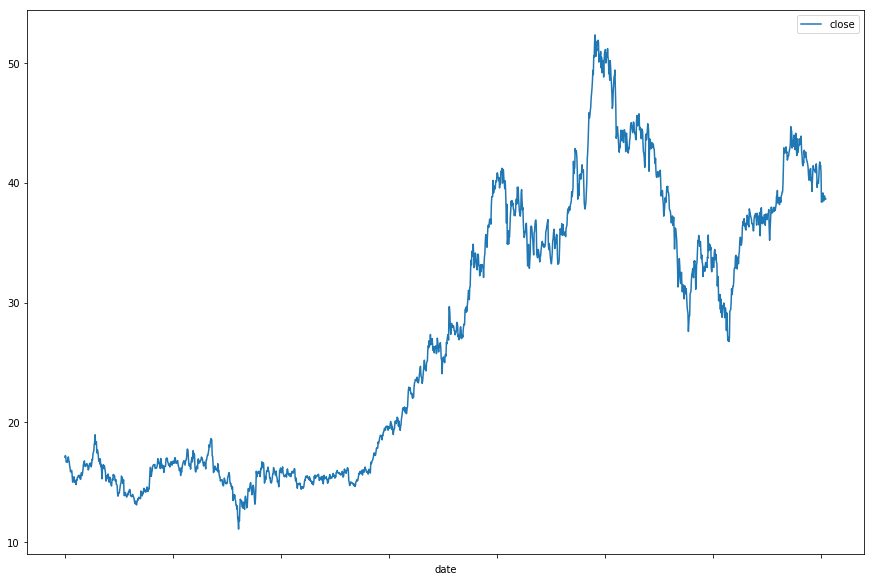

In [57]:
XL.plot(kind="line", x="date", y="close", figsize=(15, 10))

In [58]:
corr_matrix = XL.corr()

In [59]:
corr_matrix["close"].sort_values(ascending=False)

close                    1.000000
low                      0.999663
high                     0.999646
open                     0.999184
changefrompreviousday   -0.022845
changeduringday         -0.070305
volume                  -0.172272
Name: close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10642617d0>,
      dtype=object)

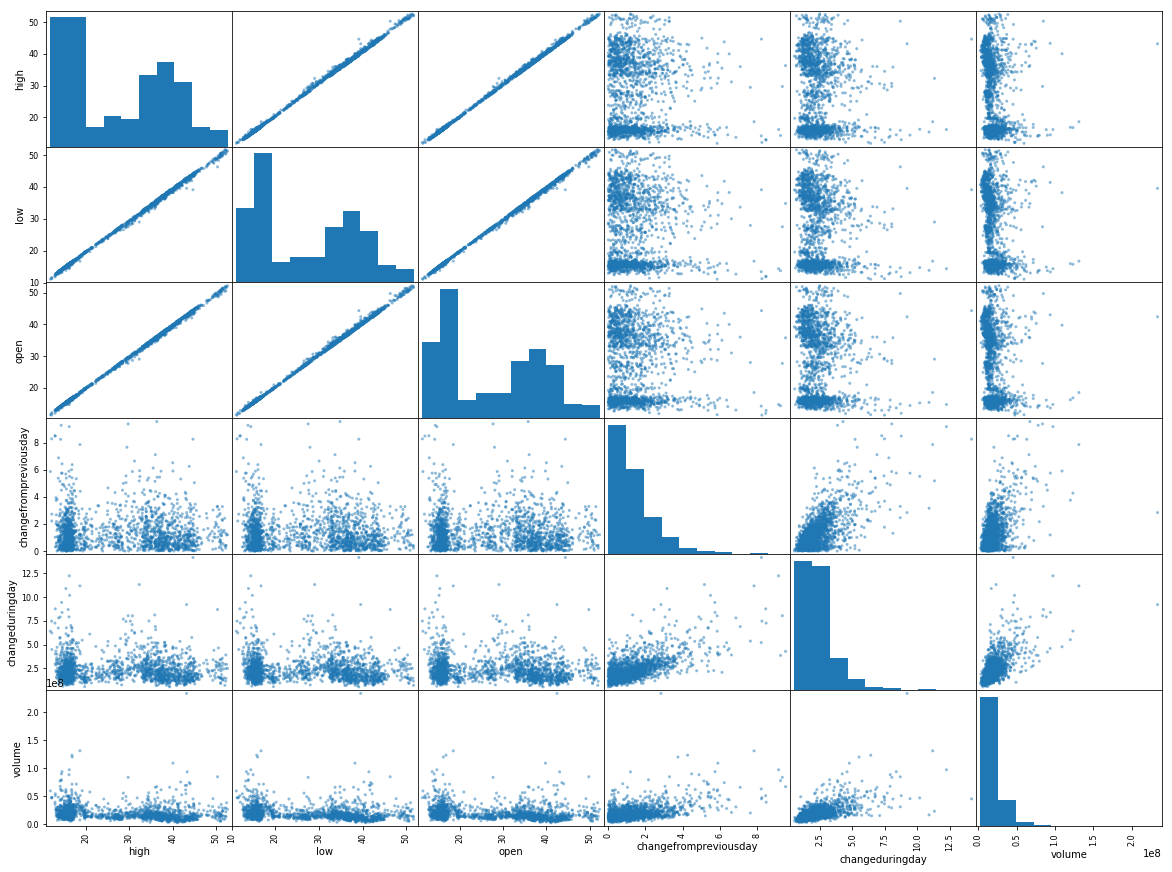

In [60]:
from pandas.plotting import scatter_matrix

attributes = ["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]

scatter_matrix(XL[attributes], figsize=(20, 15))

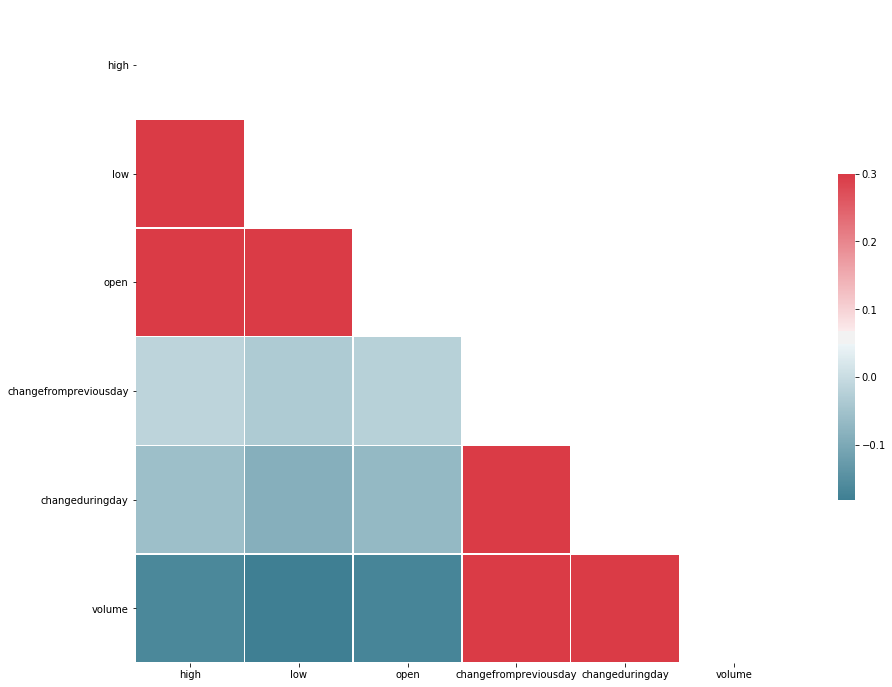

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
corr = XL[["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]].corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [67]:
#3. Regression model for stock representation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
X_stock_a = XL.drop(['date','symbol','close'], axis=1)
y_stock_a = XL['close']
X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_stock_a, y_stock_a, test_size=0.2, random_state=42)

In [68]:
# Normalize the data and execute Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

tree_reg = DecisionTreeRegressor(random_state=42)
dt_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('dt', DecisionTreeRegressor(random_state=42))
        
    ])

dt_pipeline_nor.fit(X_stock_train, y_stock_train)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('dt', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'))])

In [69]:
#Normalize the data and execute RBF SVR¶
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svrrbf_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('svr', SVR(kernel="rbf"))
        
    ])

svrrbf_pipeline_nor.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [70]:
#Standardize the data and execute RBF SVR
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svrrbf_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('svrrbf', SVR(kernel="rbf"))
        
    ])

svrrbf_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svrrbf', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [71]:
#Normalize the data and execute Linear Regression
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,Normalizer

from sklearn.pipeline import Pipeline

Lr_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_nor.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [72]:
#Standardize the data and execute Linear SVR¶
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('svr', SVR(kernel="linear"))
        
    ])

svr_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [73]:
#Normalize the data and execute Linear SVR
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svr_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('svr', SVR(kernel="linear"))
        
    ])

svr_pipeline_nor.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [74]:
#Standardize the data and execute Linear Regression
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Data prep pipeline

Lr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [75]:
#Standardize the data and execute Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

tree_reg = DecisionTreeRegressor(random_state=42)
dt_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('dt', DecisionTreeRegressor(random_state=42))
        
    ])

dt_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dt', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'))])

In [76]:
from sklearn.metrics import mean_absolute_error

#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mae_nor = mean_absolute_error(y_stock_test, lr_stock_predictions_nor)
print('Lr MAE with Normalization', lr_mae_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mae_std = mean_absolute_error(y_stock_test, lr_stock_predictions_std)
print('Lr MAE with standardization', lr_mae_std)

#SVM with RFB Kernel with normalisation and standardisation
svmrbf_stock_predictions_nor = svrrbf_pipeline_nor.predict(X_stock_test)
svmrbf_mae_nor = mean_absolute_error(y_stock_test, svmrbf_stock_predictions_nor)
print('SVM RBF MAE with Normalization', svmrbf_mae_nor)


svmrbf_stock_predictions_std = svrrbf_pipeline_std.predict(X_stock_test)
svmrbf_mae_std = mean_absolute_error(y_stock_test, svmrbf_stock_predictions_std)
print('SVM RBF MAE with standardization', svmrbf_mae_std)

#SVM with normalisation and standardisation
svm_stock_predictions_nor = svr_pipeline_nor.predict(X_stock_test)
svm_mae_nor = mean_absolute_error(y_stock_test, svm_stock_predictions_nor)
print('SVM MAE with Normalization', svm_mae_nor)

svm_stock_predictions_std = svr_pipeline_std.predict(X_stock_test)
svm_mae_std = mean_absolute_error(y_stock_test, svm_stock_predictions_std)
print('SVM MAE with standardization', svm_mae_std)

#Decision Tree with normalisation and standardisation
dt_stock_predictions_nor = dt_pipeline_nor.predict(X_stock_test)
dt_mae_nor = mean_absolute_error(y_stock_test, dt_stock_predictions_nor)
print('DecisionTree MAE with Normalization', dt_mae_nor)

dt_stock_predictions_std = dt_pipeline_std.predict(X_stock_test)
dt_mae_std = mean_absolute_error(y_stock_test, dt_stock_predictions_std)
print('DecisionTree MAE with standardization', dt_mae_std)

('Lr MAE with Normalization', 3.1597440682321176)
('Lr MAE with standardization', 0.13381043050953026)
('SVM RBF MAE with Normalization', 10.646685485920763)
('SVM RBF MAE with standardization', 0.6022939949819964)
('SVM MAE with Normalization', 10.646685483258052)
('SVM MAE with standardization', 0.15418956966955638)
('DecisionTree MAE with Normalization', 9.973849273071304)
('DecisionTree MAE with standardization', 0.216203852691218)


In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#Linear Regression with normalisation and standardisation
#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mse_nor = mean_squared_error(y_stock_test, lr_stock_predictions_nor)
lr_rmse_nor = np.sqrt(lr_mse_nor)
print('Lr RMSE with Normalization', lr_rmse_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mse_std = mean_squared_error(y_stock_test, lr_stock_predictions_std)
lr_rmse_std = np.sqrt(lr_mse_std)
print('Lr RMSE with standardization', lr_rmse_std)

#SVM with RFB Kernel with normalisation and standardisation
svmrbf_stock_predictions_nor = svrrbf_pipeline_nor.predict(X_stock_test)
svmrbf_mse_nor = mean_squared_error(y_stock_test, svmrbf_stock_predictions_nor)
svmrbf_rmse_nor = np.sqrt(svmrbf_mse_nor)
print('SVM RBF RMSE with Normalization', svmrbf_rmse_nor)


svmrbf_stock_predictions_std = svrrbf_pipeline_std.predict(X_stock_test)
svmrbf_mse_std = mean_squared_error(y_stock_test, svmrbf_stock_predictions_std)
svmrbf_rmse_std = np.sqrt(svmrbf_mse_std)
print('SVM RBF RMSE with standardization', svmrbf_rmse_std)

#SVM with normalisation and standardisation
svm_stock_predictions_nor = svr_pipeline_nor.predict(X_stock_test)
svm_mse_nor = mean_squared_error(y_stock_test, svm_stock_predictions_nor)
svm_rmse_nor = np.sqrt(svm_mse_nor)
print('SVM RMSE with Normalization', svm_rmse_nor)

svm_stock_predictions_std = svr_pipeline_std.predict(X_stock_test)
svm_mse_std = mean_squared_error(y_stock_test, svm_stock_predictions_std)
svm_rmse_std = np.sqrt(svm_mse_std)
print('SVM RMSE with standardization', svm_rmse_std)

from sklearn.metrics import mean_squared_error
#Decision Tree with normalisation and standardisation
dt_stock_predictions_nor = dt_pipeline_nor.predict(X_stock_test)
dt_mse_nor = mean_squared_error(y_stock_test, dt_stock_predictions_nor)
dt_rmse_nor = np.sqrt(dt_mse_nor)
print('DecisionTree RMSE with Normalization', dt_rmse_nor)

dt_stock_predictions_std = dt_pipeline_std.predict(X_stock_test)
dt_mse_std = mean_squared_error(y_stock_test, dt_stock_predictions_std)
dt_rmse_std = np.sqrt(dt_mse_std)
print('DecisionTree RMSE with standardization', dt_rmse_std)




('Lr RMSE with Normalization', 4.807268068903346)
('Lr RMSE with standardization', 0.19357577579367383)
('SVM RBF RMSE with Normalization', 11.530092837746102)
('SVM RBF RMSE with standardization', 1.5596966030094823)
('SVM RMSE with Normalization', 11.53009283488778)
('SVM RMSE with standardization', 0.2078065404725069)
('DecisionTree RMSE with Normalization', 10.972669473634838)
('DecisionTree RMSE with standardization', 0.32303524562590546)


In [81]:
lr_std = ['1',"Linear Regression with standardisation",np.round(lr_rmse_std,3),np.round(lr_mae_std,3)]
lr_nor = ['2',"Linear Regression with normalisation",np.round(lr_rmse_nor,3),np.round(lr_mae_nor,3)]
dt_std = ['3',"Decision Tree with standardisation",np.round(dt_rmse_std,3),np.round(dt_mae_std,3)]
dt_nor = ['4',"Decision Tree with normalisation",np.round(dt_rmse_nor,3),np.round(dt_mae_nor,3)]

svm_std = ['5',"SVM with standardisation",np.round(svm_rmse_std,3),np.round(svm_mae_std,3)]
svm_nor = ['6',"SVM with normalisation",np.round(svm_rmse_nor,3),np.round(svm_mae_nor,3)]

svmrfb_std = ['7',"SVM RFB with standardisation",np.round(svmrbf_rmse_std,3),np.round(svmrbf_mae_std,3)]
svmrfb_nor = ['8',"SVM RFB with normalisation",np.round(svmrbf_rmse_nor,3),np.round(svmrbf_mae_nor,3)]
#ridge_std = ['9',"Ridge Regression with standardisation",np.round(ridge_rmse_std,3),np.round(ridge_mae_std,3)]
#lasso_std = ['10',"Lasso Regression with standardisation",np.round(lasso_rmse_std,3),np.round(lasso_mae_std,3)]



In [82]:
#,ridge_std,lasso_std
linear_model_result= pd.DataFrame([lr_std,lr_nor,dt_std,dt_nor,svm_std,svm_nor,svmrfb_std,svmrfb_nor],columns=[ "ExpID", "Model", "RMSE","MAE"])

linear_model_result

,ExpID,Model,RMSE,MAE
0,1,Linear Regression with standardisation,0.194,0.134
1,2,Linear Regression with normalisation,4.807,3.160
2,3,Decision Tree with standardisation,0.323,0.216
3,4,Decision Tree with normalisation,10.973,9.974
4,5,SVM with standardisation,0.208,0.154
5,6,SVM with normalisation,11.530,10.647
6,7,SVM RFB with standardisation,1.560,0.602
7,8,SVM RFB with normalisation,11.530,10.647


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').